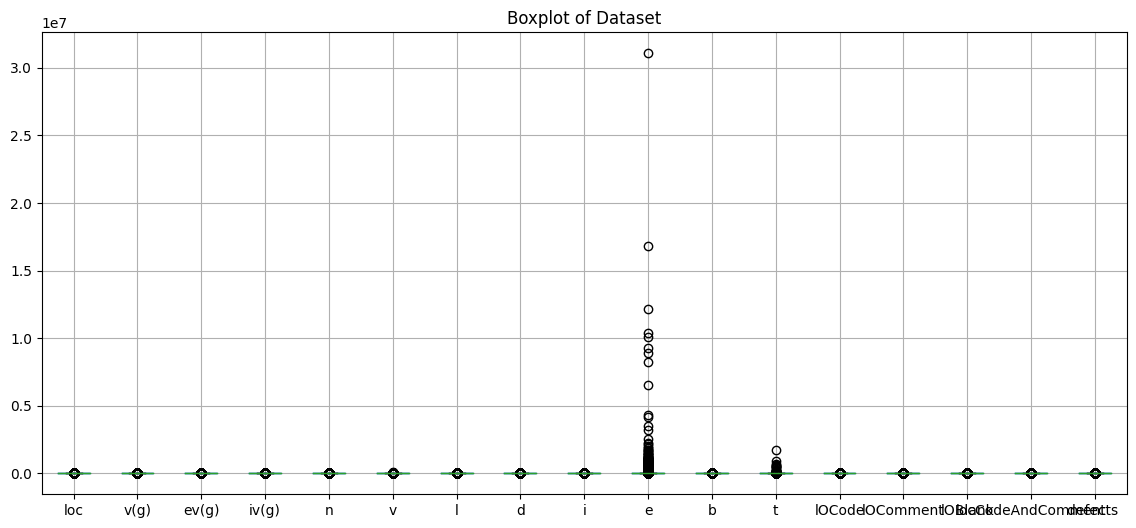

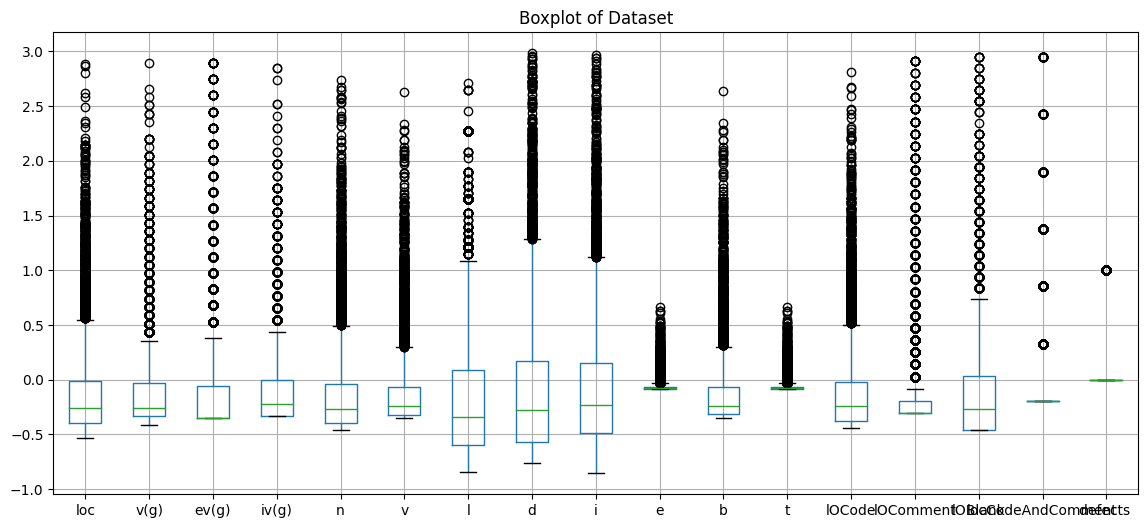

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



# Step 2: Load the dataset
data = pd.read_csv("JM1.csv")
data = data.replace('?', np.nan)
data = data.dropna()

plt.figure(figsize=(14, 6))
data.boxplot()
plt.title('Boxplot of Dataset')
plt.show()



numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
exclude_column = 'defects '  # Specify the column to exclude

# Remove outliers using z-score method for numeric_columns except for exclude_column
columns_to_process = [col for col in numeric_columns if col != exclude_column]


scaler = StandardScaler()
data[columns_to_process] = scaler.fit_transform(data[columns_to_process])


z_scores = np.abs((data[columns_to_process] - data[columns_to_process].mean()) / data[columns_to_process].std())
threshold = 3  # Set the threshold for outlier detection
data = data[(z_scores < threshold).all(axis=1)]

plt.figure(figsize=(14, 6))
data.boxplot()
plt.title('Boxplot of Dataset')
plt.show()


In [6]:
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
2,0.391356,0.050092,-0.354386,0.219185,0.335054,0.237400,-0.531642,0.327749,0.767281,-0.031803,...,0.415076,0.805900,0.338525,0.329635,17,36,112,86,13,True
4,-0.065533,-0.180300,-0.354386,-0.000155,0.046520,-0.038497,-0.469354,0.161006,0.157492,-0.061108,...,0.029300,-0.192983,0.137912,-0.194390,11,16,76,50,7,True
5,-0.143856,-0.333894,-0.354386,-0.219495,-0.013591,-0.047057,-0.344777,-0.103003,0.526154,-0.068385,...,-0.121656,-0.303969,0.037606,-0.194390,14,24,69,42,3,True
6,0.469680,0.203686,0.236248,-0.000155,-0.458413,-0.347455,-0.843082,-0.757682,-0.855240,-0.084810,...,-0.440340,-0.303969,-0.463926,-0.194390,0,0,0,0,17,True
7,-0.444097,-0.410691,-0.354386,-0.329165,-0.394294,-0.321299,1.399290,-0.608041,-0.329119,-0.084484,...,-0.356476,-0.303969,-0.363620,-0.194390,4,5,9,7,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,-0.313558,-0.180300,-0.354386,-0.000155,-0.250028,-0.222927,0.028951,-0.365944,0.101423,-0.080734,...,-0.222293,-0.303969,-0.263313,-0.194390,10,15,30,22,7,False
10881,-0.431043,-0.333894,-0.354386,-0.219495,-0.338191,-0.280591,-0.095625,-0.316776,-0.398552,-0.082348,...,-0.356476,-0.303969,-0.263313,-0.194390,12,8,19,11,3,False
10882,-0.000263,-0.180300,-0.354386,-0.219495,-0.045650,-0.079520,-0.593930,0.653218,-0.283508,-0.053238,...,0.046073,-0.192983,0.539138,-0.194390,18,15,59,44,7,False
10883,-0.417990,-0.410691,-0.354386,-0.329165,-0.314146,-0.271572,-0.095625,-0.306622,-0.348584,-0.081953,...,-0.339703,-0.303969,-0.263313,-0.194390,9,8,21,15,1,False


In [7]:
X = data.drop('defects ', axis=1)
y = data['defects '].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred_prob = model.predict(X_test)


In [9]:
mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Root Mean Squared Error: 0.3771129262556273
R-squared: 0.08675345036894977


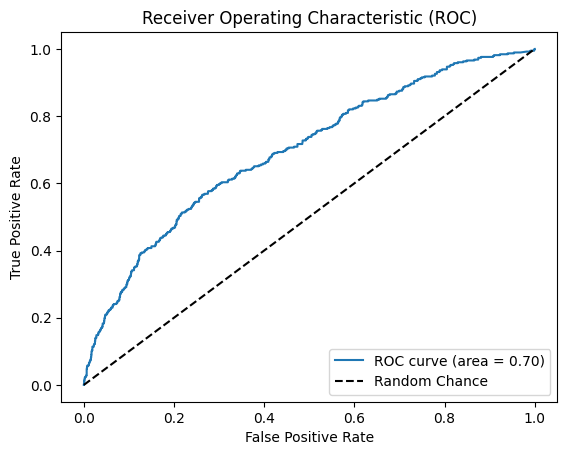

In [10]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 10: Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(probability=True)

model.fit(X_train, y_train)
y_pred_prob = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred_prob)
print("Accuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Accuracy: 0.8075548749361919
Root Mean Squared Error: 0.4386856791186693
R-squared: 0.8075548749361919


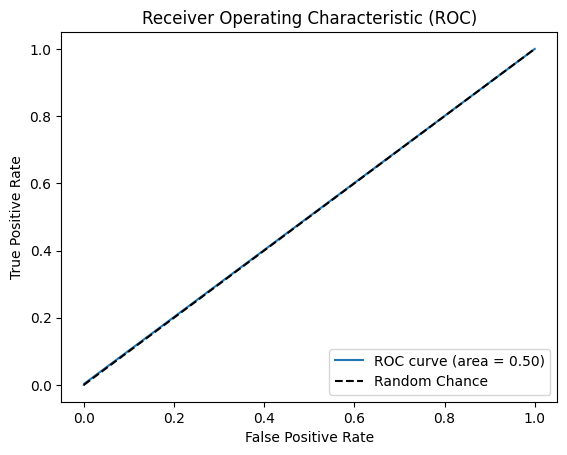

In [13]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 10: Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [15]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
probabilities = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probabilities)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("AUC:", auc)



mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Accuracy: 0.8126595201633486
Confusion Matrix:
[[1558   23]
 [ 344   34]]
AUC: 0.6888999327329499
Root Mean Squared Error: 0.4328284646793131
R-squared: 0.8126595201633486


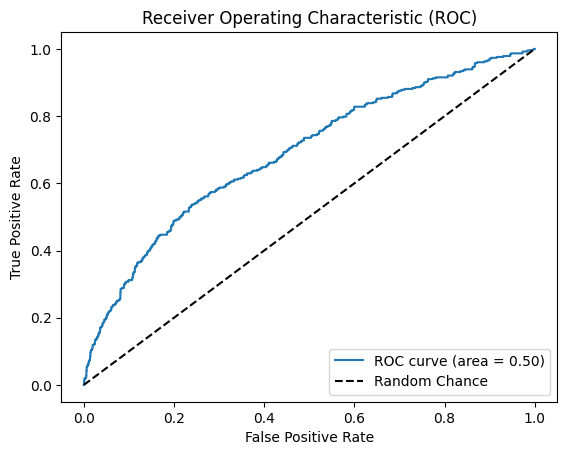

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()